# Plots

## Imports

In [1]:
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='poster', style='white',
        font='sans-serif', font_scale=0.9, color_codes=True, rc=None)

## Histograms of ROCS on Test

In [66]:
def get_hist_plot(accs, title=None, savename=None, show=False, limits=None, y_label=False):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.bar('h1', accs[1])
    ax.bar('h2', accs[2])
    ax.bar('h3', accs[3])
    ax.bar('H', accs[0])
    ax.bar(r'$h_{1,2,3}$', accs[4])
    plt.title(title, fontsize=24)
    ax.set_ylim(limits)
    if y_label: ax.axes.set_ylabel('ROC-AUC Score', fontsize=24)
    plt.tight_layout()
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    if show: plt.show()
    if savename: plt.savefig(savename+'.pdf')

## COVID DB

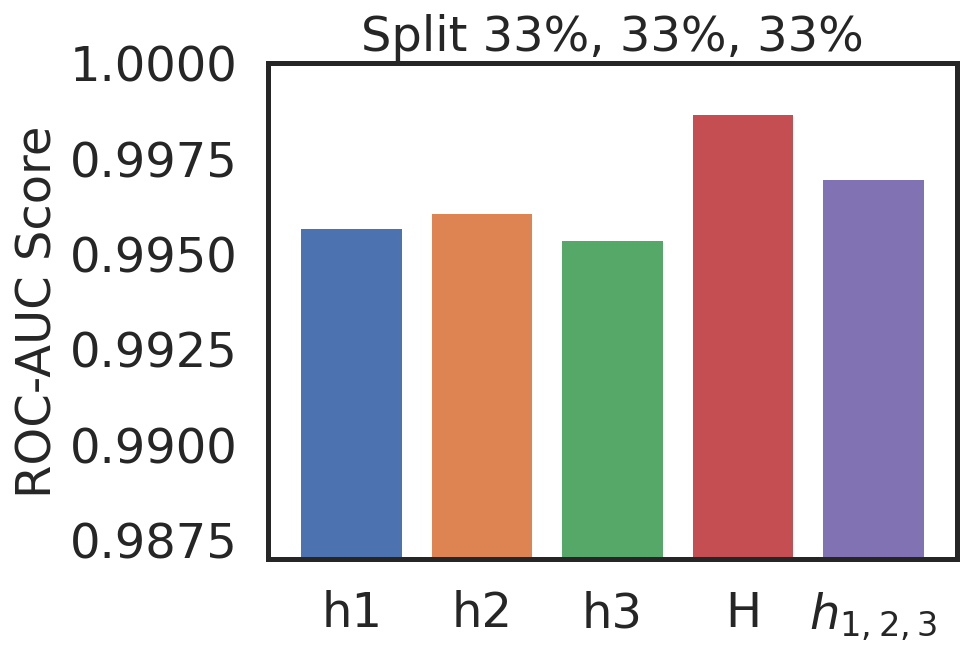

<Figure size 432x288 with 0 Axes>

In [72]:
get_hist_plot([0.9987, 0.9957, 0.9961, 0.9954, 0.9970], 'Split 33%, 33%, 33%', 'ROCS_33_33_33', True, [0.987, 1.], True)

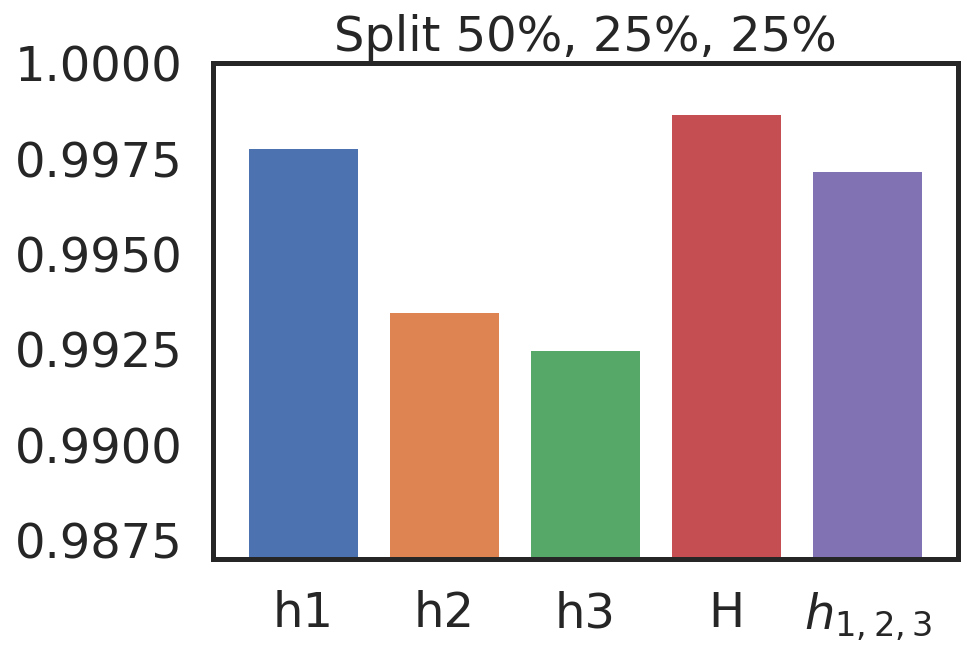

<Figure size 432x288 with 0 Axes>

In [70]:
get_hist_plot([0.9987, 0.9978, 0.9935, 0.9925, 0.9972], 'Split 50%, 25%, 25%', 'ROCS_50_25_25', True, [0.987, 1.])

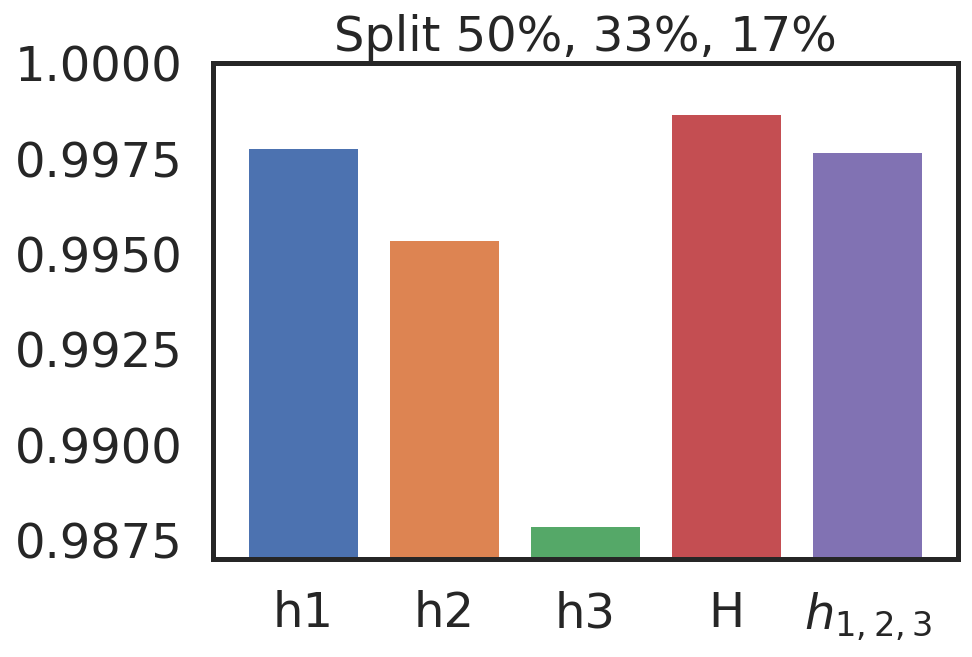

<Figure size 432x288 with 0 Axes>

In [71]:
get_hist_plot([0.9987, 0.9978, 0.9954, 0.9879, 0.9977], 'Split 50%, 33%, 17%', 'ROCS_50_33_17', True, [0.987, 1.])

## Cancer DB

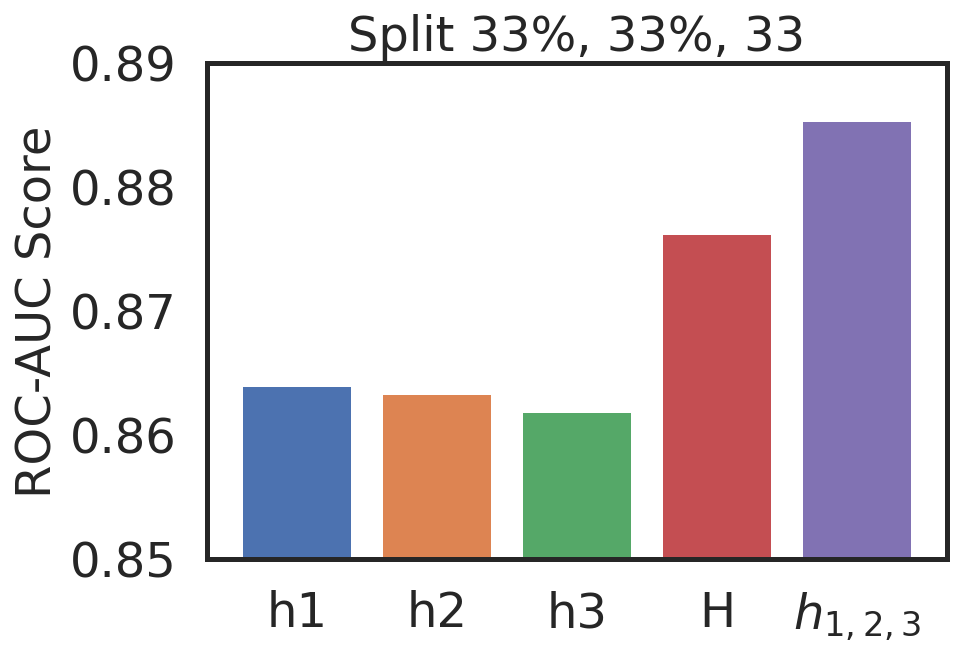

<Figure size 432x288 with 0 Axes>

In [73]:
get_hist_plot([0.8763, 0.8640, 0.8634, 0.8619, 0.8854], 'Split 33%, 33%, 33', 'Cancer_ROCS_33_33_33', True, [0.85, 0.89], True)

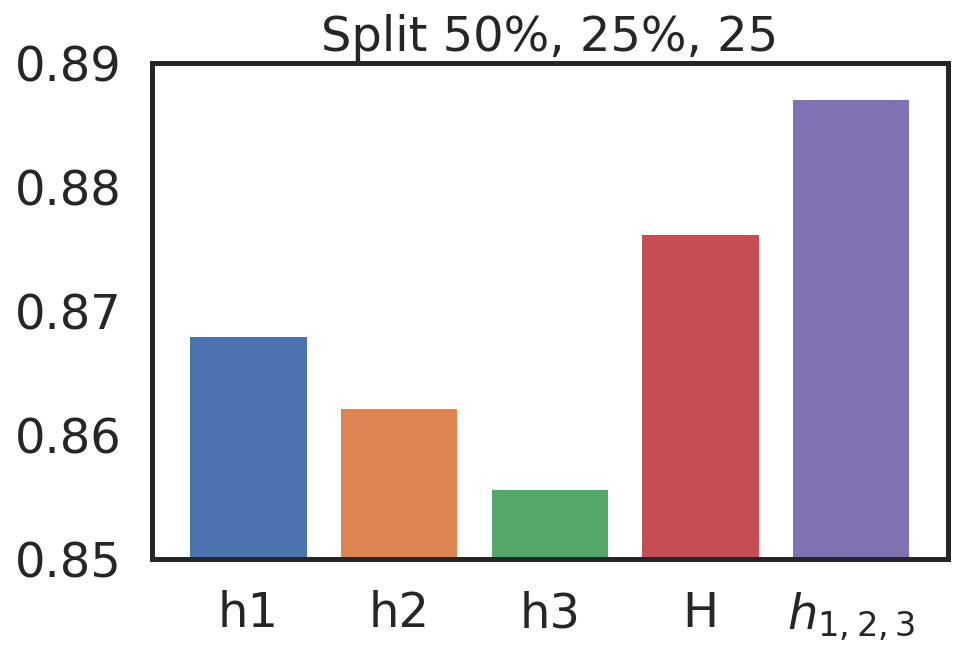

<Figure size 432x288 with 0 Axes>

In [74]:
get_hist_plot([0.8763, 0.8681, 0.8623, 0.8557, 0.8872], 'Split 50%, 25%, 25', 'Cancer_ROCS_50_25_25', True, [0.85, 0.89])

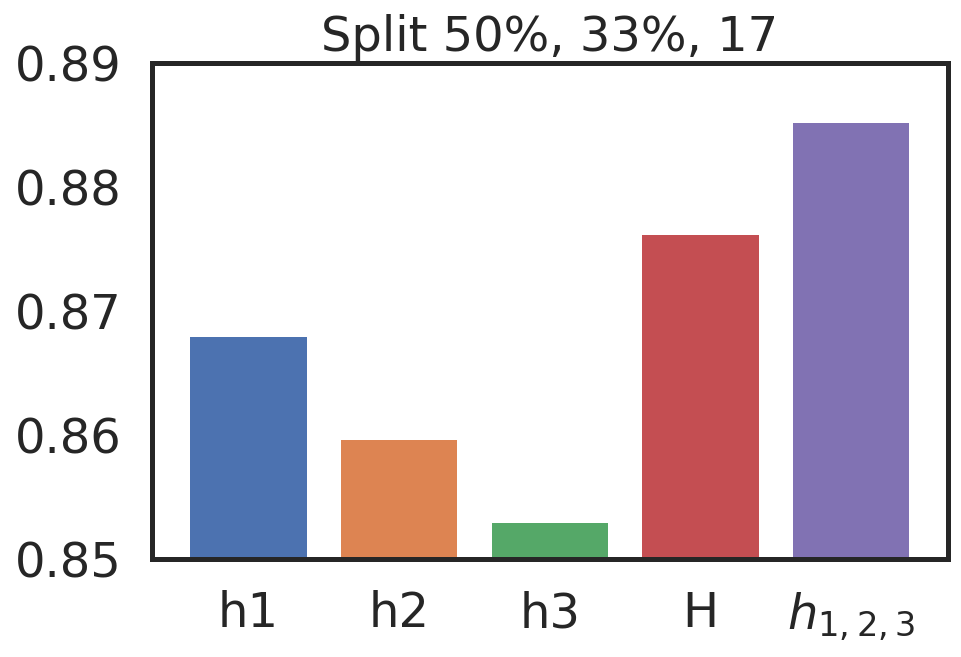

<Figure size 432x288 with 0 Axes>

In [75]:
get_hist_plot([0.8763, 0.8681, 0.8598, 0.8531, 0.8853], 'Split 50%, 33%, 17', 'Cancer_ROCS_50_33_17', True, [0.85, 0.89])

___

# Evolution of ROCs

# COVID

In [76]:
ls weights/

H/  Split_03_03_03/  Split_05_025_025/  Split_05_033_017/


In [77]:
def load_csv(path):
    csv = pd.read_csv(path)
    csv = csv.drop([1, 7, 9, 15, 17])
    
    acc, roc = csv.accuracy.values.astype(float), csv.roc_auc_score.values.astype(float)
    return acc, roc

In [78]:
def plot_accs(accs, title=None, savename=None, show=False):
    fig, ax = plt.subplots(figsize=(9,5))
    epochs = np.linspace(0,1,len(accs[0]))
    plt.plot(epochs, accs[1], label='h1')
    plt.plot(epochs, accs[2], label='h2')
    plt.plot(epochs, accs[3], label='h3')
    plt.plot(epochs, accs[0], label='H')
    plt.axvline(x=0.3333, linestyle='--', c='black')
    plt.axvline(x=0.6666, linestyle='--', c='black')
    plt.axvline(x=1., linestyle='--', c='black')
    plt.legend(loc='lower right',framealpha=1)
    ax.axes.set_ylabel('Accuracy (%)', fontsize=24)
    ax.axes.set_xlabel('Training Epochs (%)', fontsize=24)

    plt.title(title)
    plt.tight_layout()
    if show: plt.show()
    if savename: plt.savefig(savename+'.pdf')

In [79]:
def plot_rocs(rocs, title=None, savename=None, show=False):
    fig, ax = plt.subplots(figsize=(9,5))
    epochs = np.linspace(0,1,len(rocs[0]))
    plt.plot(epochs, rocs[1], label='h1')
    plt.plot(epochs, rocs[2], label='h2')
    plt.plot(epochs, rocs[3], label='h3')
    plt.plot(epochs, rocs[0], label='H')
    plt.axvline(x=0.3333, linestyle='--', c='black')
    plt.axvline(x=0.6666, linestyle='--', c='black')
    plt.axvline(x=1., linestyle='--', c='black')
    plt.legend(loc='lower right',framealpha=1)
    ax.axes.set_ylabel('ROC-AUC Score', fontsize=24)
    ax.axes.set_xlabel('Training Epochs (%)', fontsize=24)

    plt.title(title)
    plt.tight_layout()
    if show: plt.show()
    if savename: plt.savefig(savename+'.pdf')

## Split 05, 025, 025

#### Models alone

In [13]:
acc_H, roc_H = load_csv('weights/H/covid_database/csv05_H.csv')
acc_h0, roc_h0 = load_csv('weights/Split_05_025_025/covid_database/no_federated05_025_025/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_025_025/covid_database/no_federated05_025_025/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_025_025/covid_database/no_federated05_025_025/H2/csv05_H2.csv')

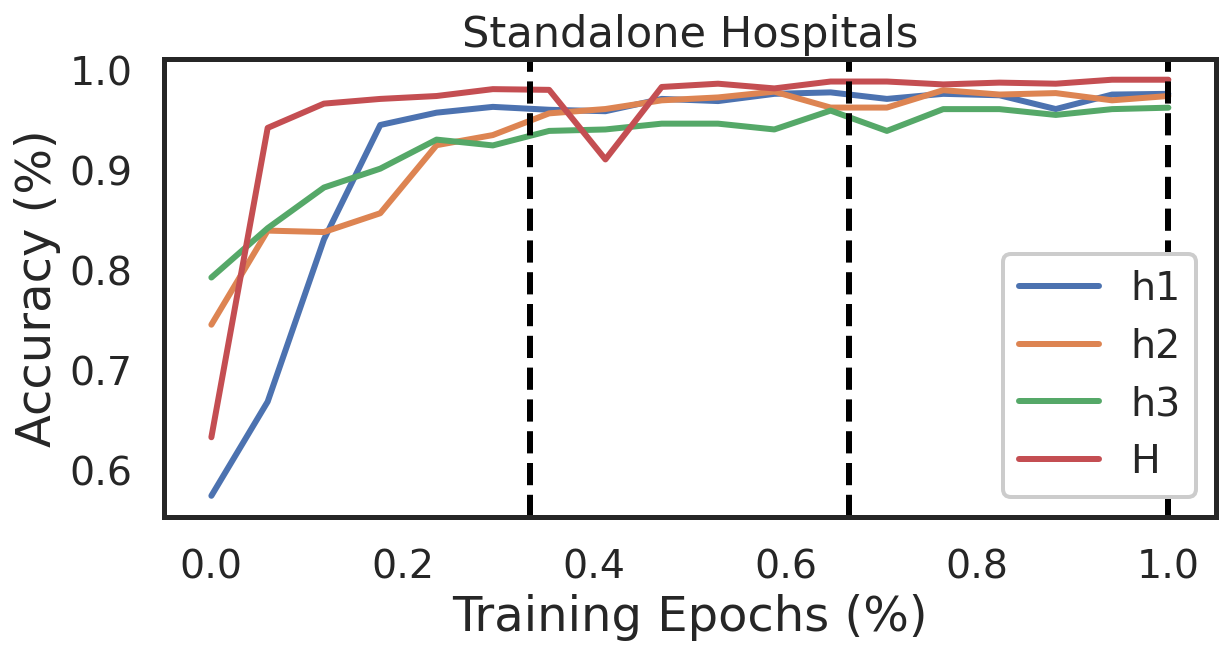

<Figure size 432x288 with 0 Axes>

In [14]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Split_05_025_025_ACC_alone', True)

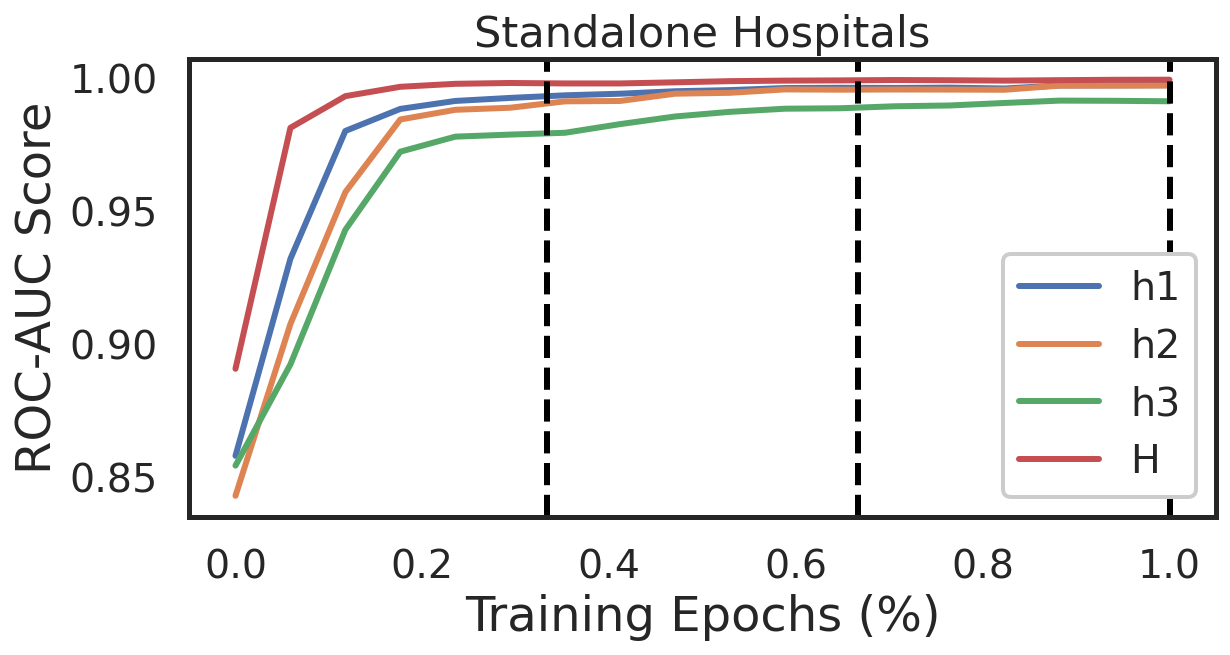

<Figure size 432x288 with 0 Axes>

In [15]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Split_05_025_025_ROC_alone', True)

### Using FL

In [16]:
ls weights/Split_05_025_025/covid_database/federated_05_025_025/

 csv05_H0.csv               H0_roc_auc.png             H2_roc_auc.png
 csv05_H1.csv              'H1_confusion matrix.png'   round-1-weights.npz
 csv05_H2.csv               H1_roc_auc.png             round-2-weights.npz
'H0_confusion matrix.png'  'H2_confusion matrix.png'   round-3-weights.npz


In [17]:
#acc_H, roc_H = load_csv('weights/H/csv05_H.csv')
acc_h0, roc_h0 = load_csv('weights/Split_05_025_025/covid_database/federated_05_025_025/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_025_025/covid_database/federated_05_025_025/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_025_025/covid_database/federated_05_025_025/csv05_H2.csv')

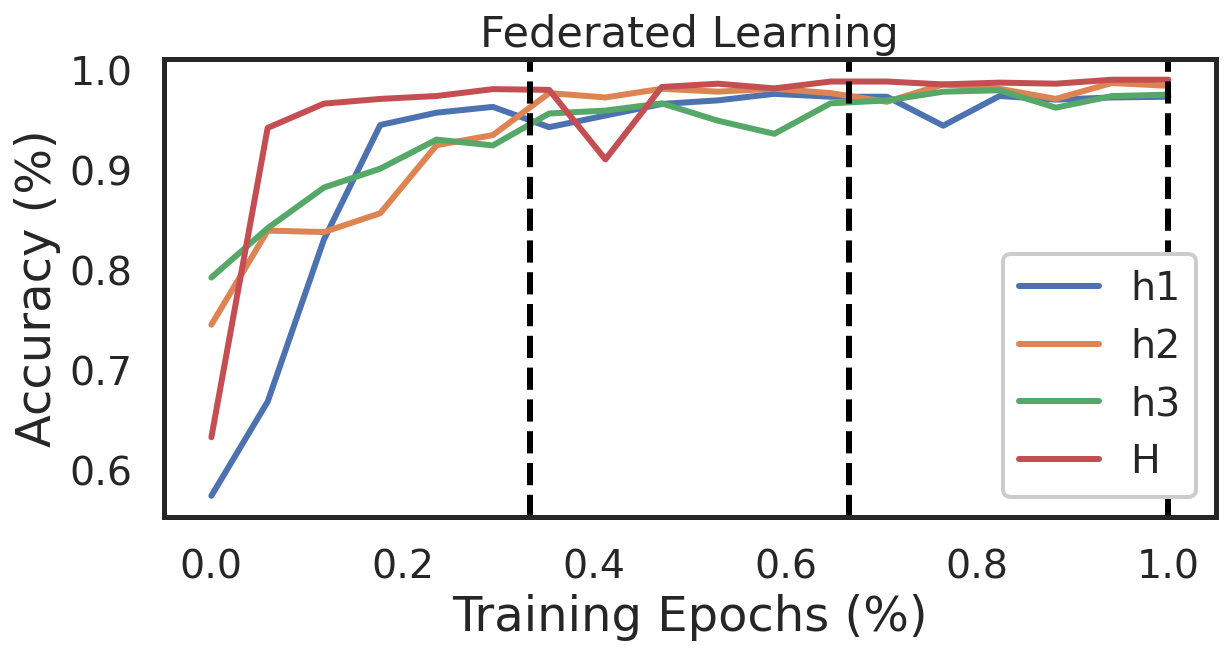

<Figure size 432x288 with 0 Axes>

In [18]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Federated Learning', 'Split_05_025_025_ACC_FL', True)

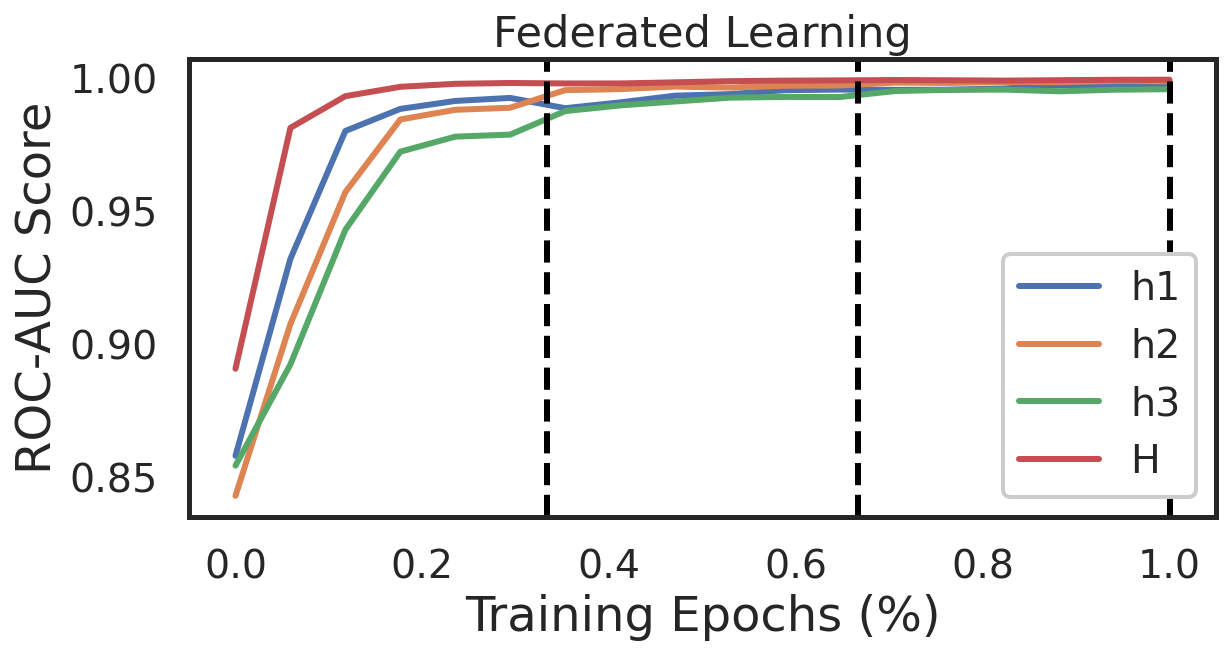

<Figure size 432x288 with 0 Axes>

In [19]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Federated Learning', 'Split_05_025_025_ROC_FL', True)

## 05 033 017 Split

### Models Alone

In [20]:
ls weights/Split_05_033_017/covid_database/

federated_05_033_017/  no_federated05_033_017/


In [21]:
acc_h0, roc_h0 = load_csv('weights/Split_05_033_017/covid_database/no_federated05_033_017/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_033_017/covid_database/no_federated05_033_017/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_033_017/covid_database/no_federated05_033_017/H2/csv05_H2.csv')

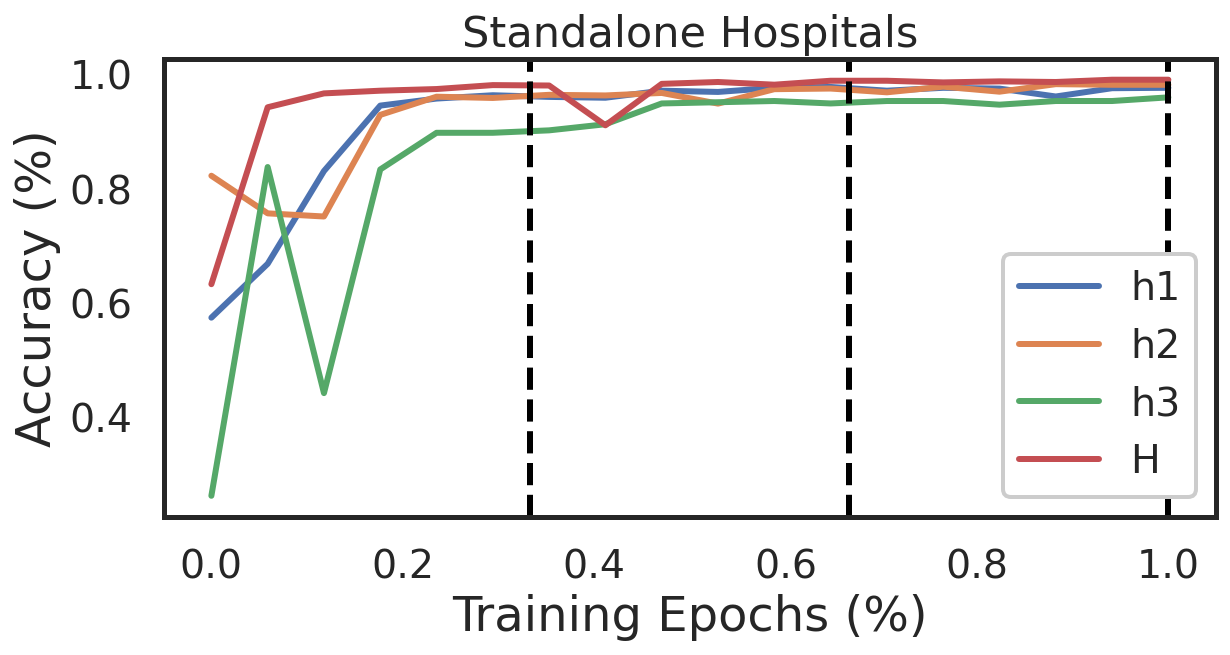

<Figure size 432x288 with 0 Axes>

In [22]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Split_05_033_017_ACC_alone', True)

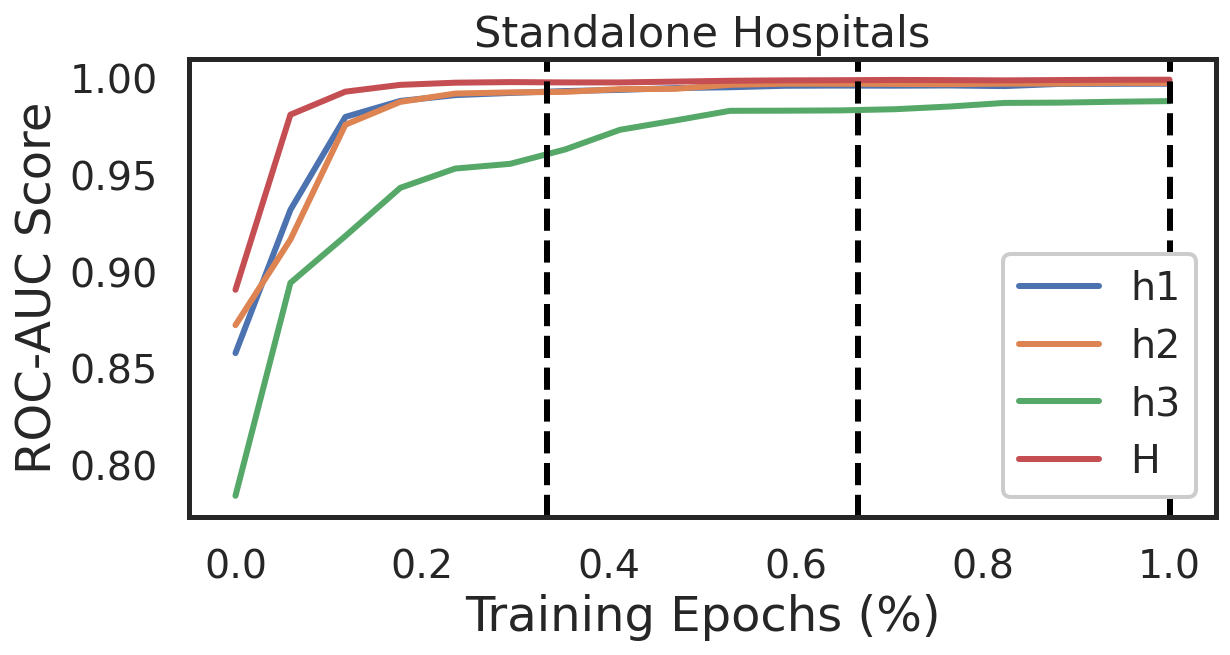

<Figure size 432x288 with 0 Axes>

In [23]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Split_05_033_017_ROC_alone', True)

### FL

In [24]:
acc_h0, roc_h0 = load_csv('weights/Split_05_033_017/covid_database/federated_05_033_017/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_033_017/covid_database/federated_05_033_017/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_033_017/covid_database/federated_05_033_017/csv05_H2.csv')

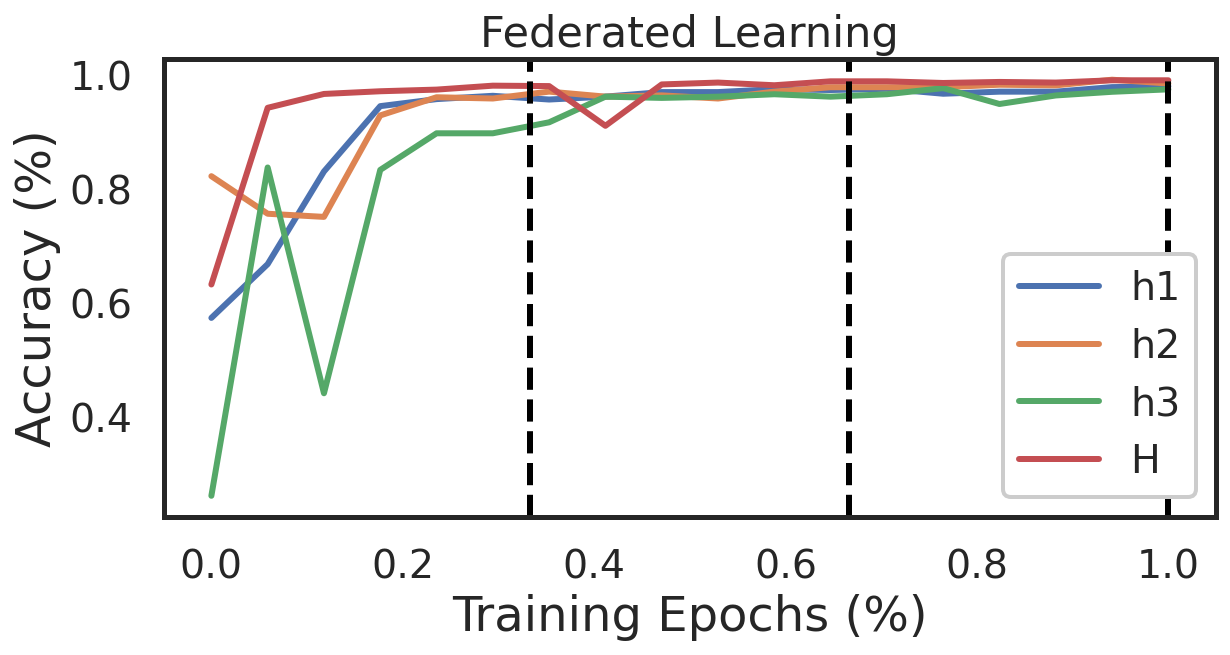

<Figure size 432x288 with 0 Axes>

In [25]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Federated Learning', 'Split_05_033_017_ACC_FL', True)

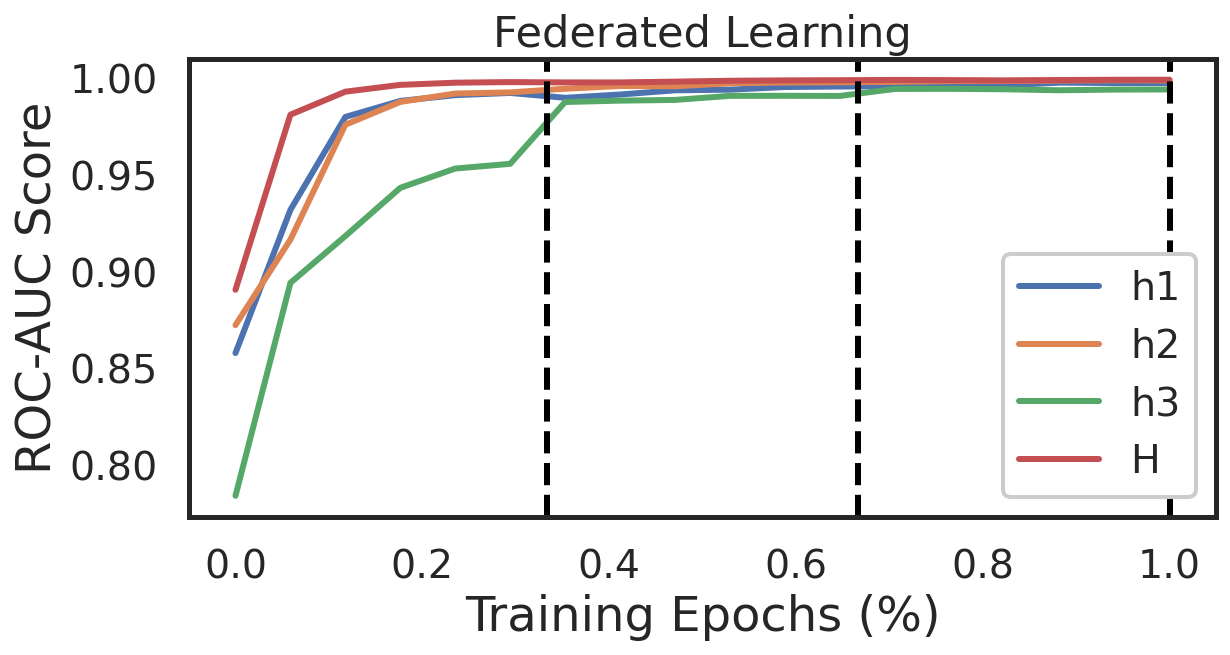

<Figure size 432x288 with 0 Axes>

In [26]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Federated Learning', 'Split_05_033_017_ROC_FL', True)

## 033 033 033 Split

### Models Alone

In [27]:
ls weights/Split_03_03_03/

cancer_database/  covid_database/


In [28]:
acc_h0, roc_h0 = load_csv('weights/Split_03_03_03/covid_database/no_federated03_03_03/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_03_03_03/covid_database/no_federated03_03_03/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_03_03_03/covid_database/no_federated03_03_03/H2/csv05_H2.csv')

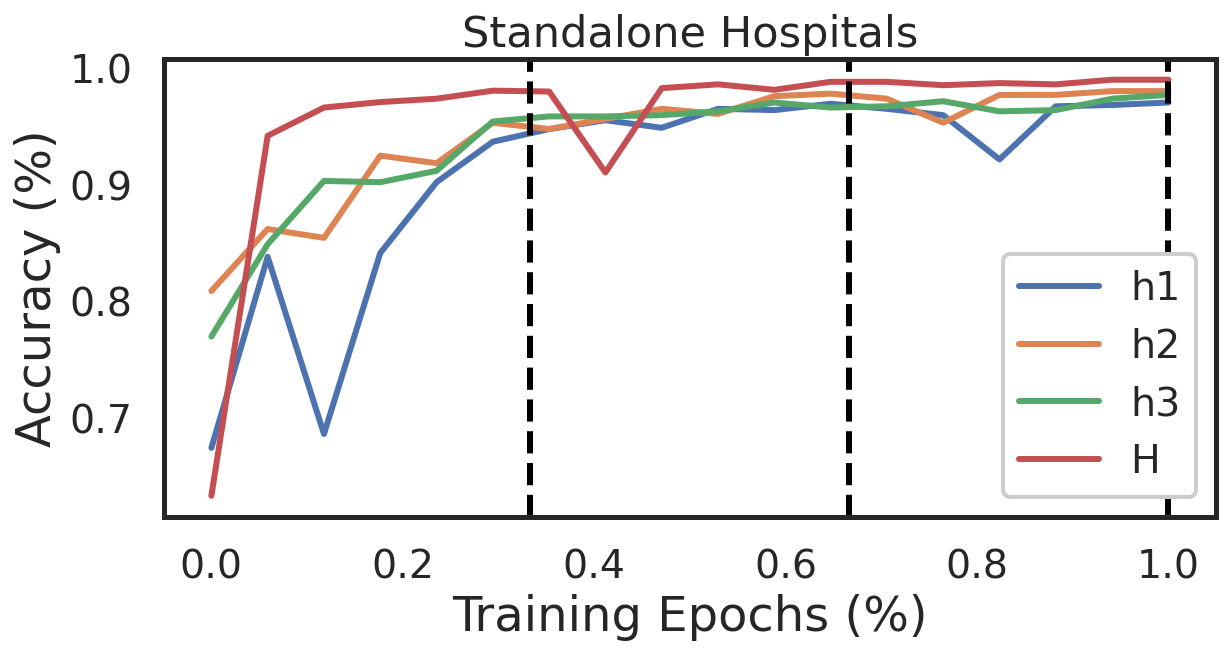

<Figure size 432x288 with 0 Axes>

In [29]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Split_033_033_033_ACC_alone', True)

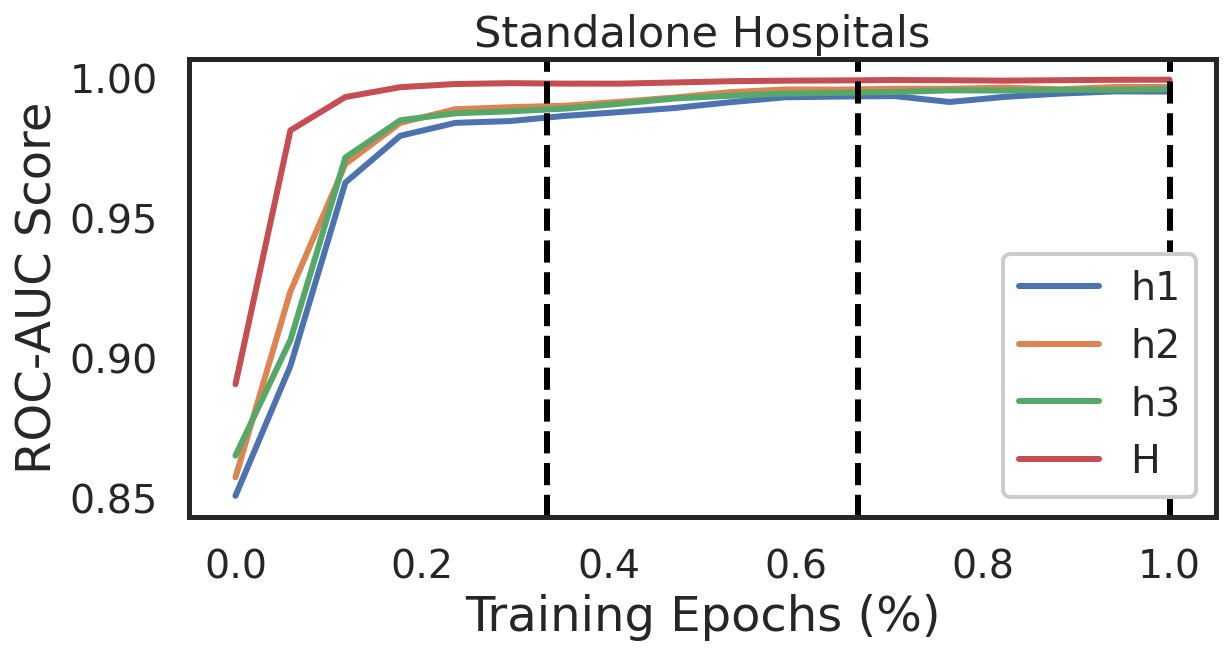

<Figure size 432x288 with 0 Axes>

In [30]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Split_033_033_033_ROC_alone', True)

### FL

In [31]:
ls weights/Split_03_03_03/covid_database/

federated03_03_03/  no_federated03_03_03/


In [32]:
acc_h0, roc_h0 = load_csv('weights/Split_03_03_03/covid_database/federated03_03_03/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_03_03_03/covid_database/federated03_03_03/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_03_03_03/covid_database/federated03_03_03/csv05_H2.csv')

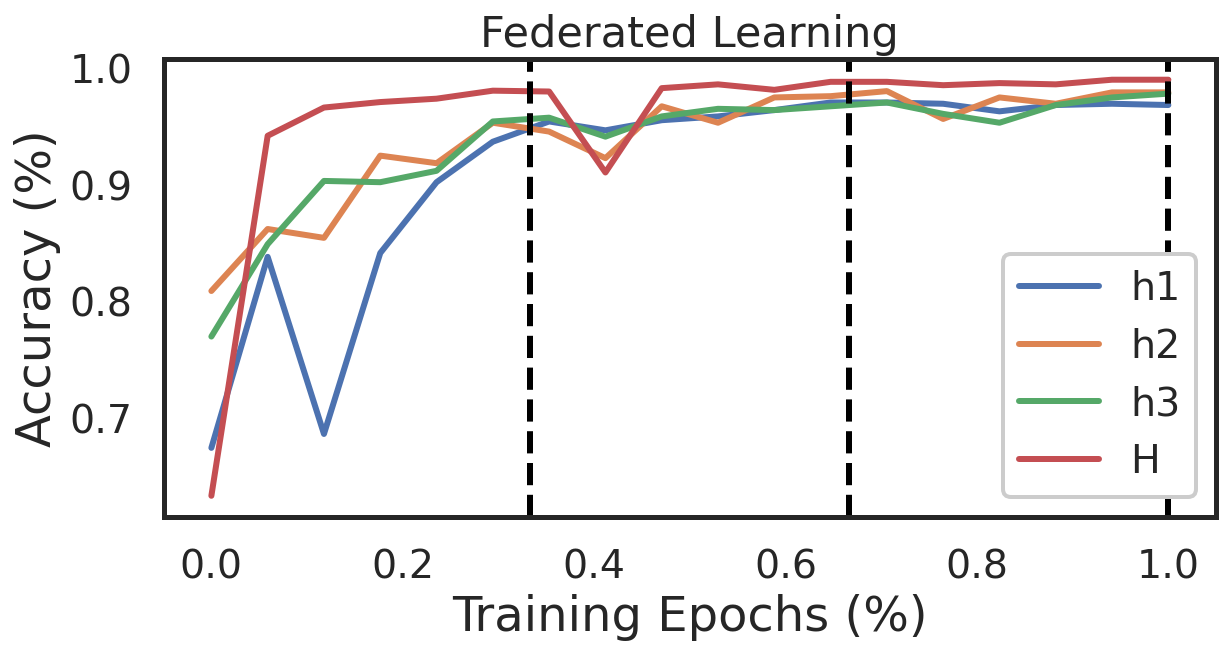

<Figure size 432x288 with 0 Axes>

In [33]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Federated Learning', 'Split_033_033_033_ACC_FL', True)

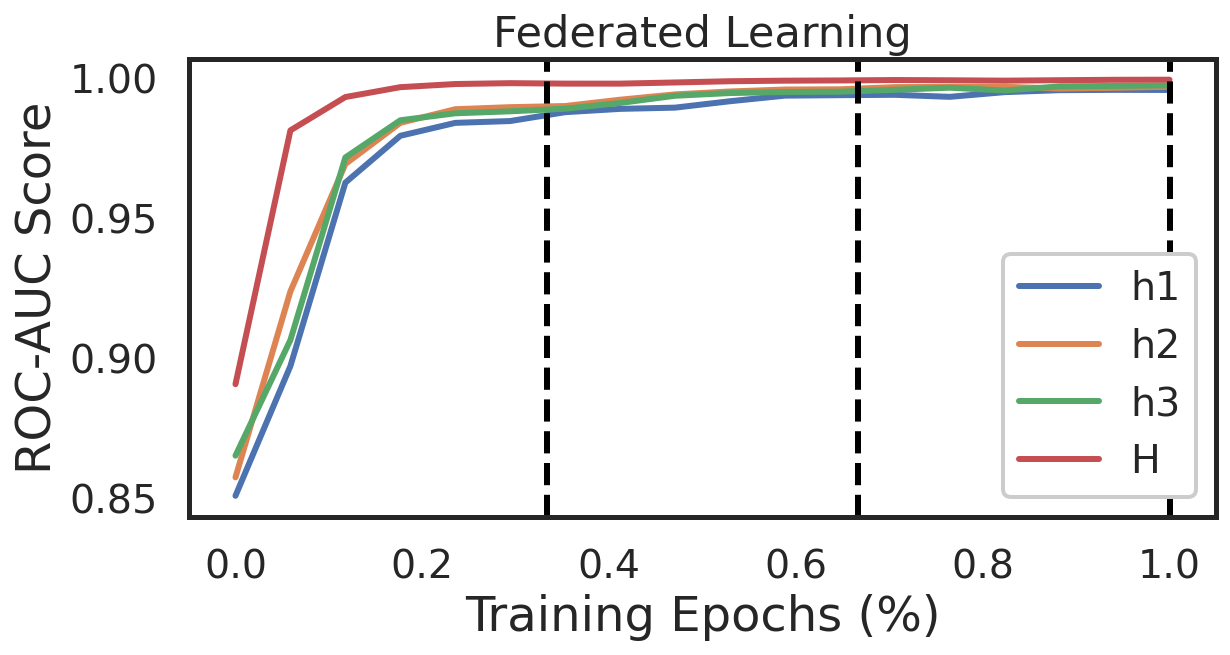

<Figure size 432x288 with 0 Axes>

In [34]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Federated Learning', 'Split_033_033_033_ROC_FL', True)

---

# CANCER Database

## Split 05, 025, 025

### Models alone

In [35]:
ls weights/

H/  Split_03_03_03/  Split_05_025_025/  Split_05_033_017/


> I don't know why all training are differents -> several loading function. Ask Antoine

In [36]:
def load_csv2(path):
    csv = pd.read_csv(path)
    csv = csv.drop([0, 2, 8, 10, 16, 18])
    
    acc, roc = csv.accuracy.values.astype(float), csv.roc_auc_score.values.astype(float)
    return acc, roc

In [37]:
def load_csvbis(path):
    csv = pd.read_csv(path)
    csv = csv.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23, 25, 31, 33, 39, 41])
    
    acc, roc = csv.accuracy.values.astype(float), csv.roc_auc_score.values.astype(float)
    return acc, roc

In [38]:
def load_csv(path):
    csv = pd.read_csv(path)
    csv = csv.drop([1, 7, 9, 15, 17])
    
    acc, roc = csv.accuracy.values.astype(float), csv.roc_auc_score.values.astype(float)
    return acc, roc

In [39]:
acc_H, roc_H = load_csv2('weights/H/cancer_database/csv05_H.csv')
acc_h0, roc_h0 = load_csvbis('weights/Split_05_025_025/cancer_database/no_federated05_025_025/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csvbis('weights/Split_05_025_025/cancer_database/no_federated05_025_025/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_025_025/cancer_database/no_federated05_025_025/H2/csv05_H2.csv')

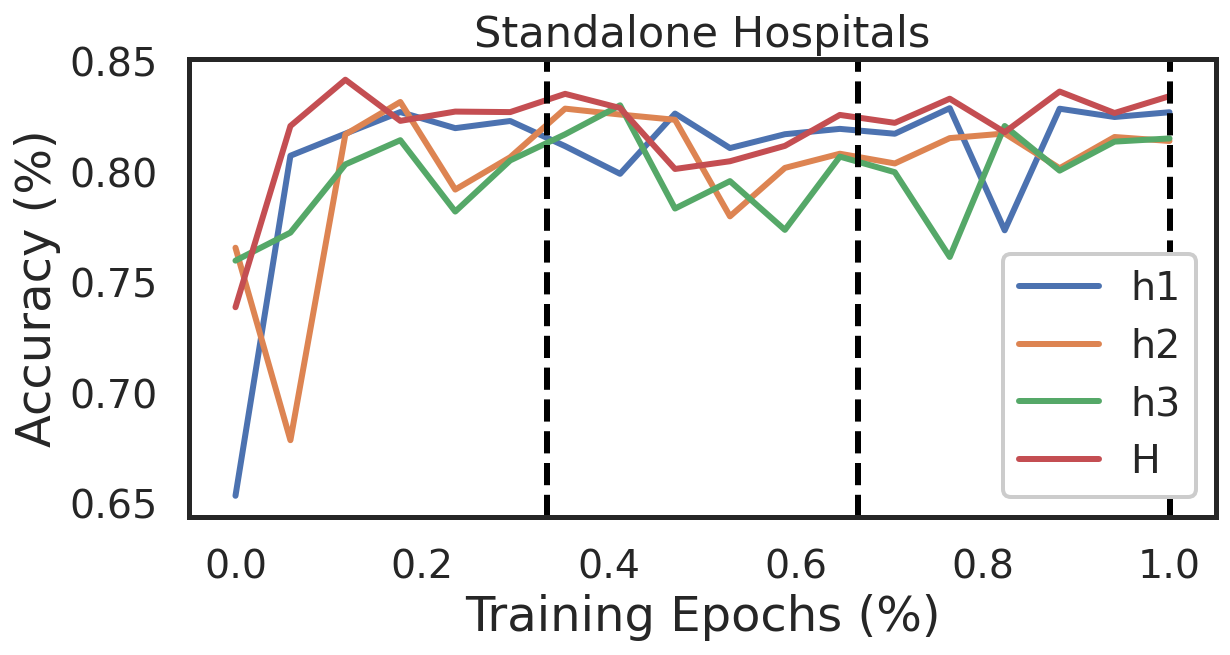

<Figure size 432x288 with 0 Axes>

In [40]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Cancer_Split_05_025_025_ACC_alone', True)

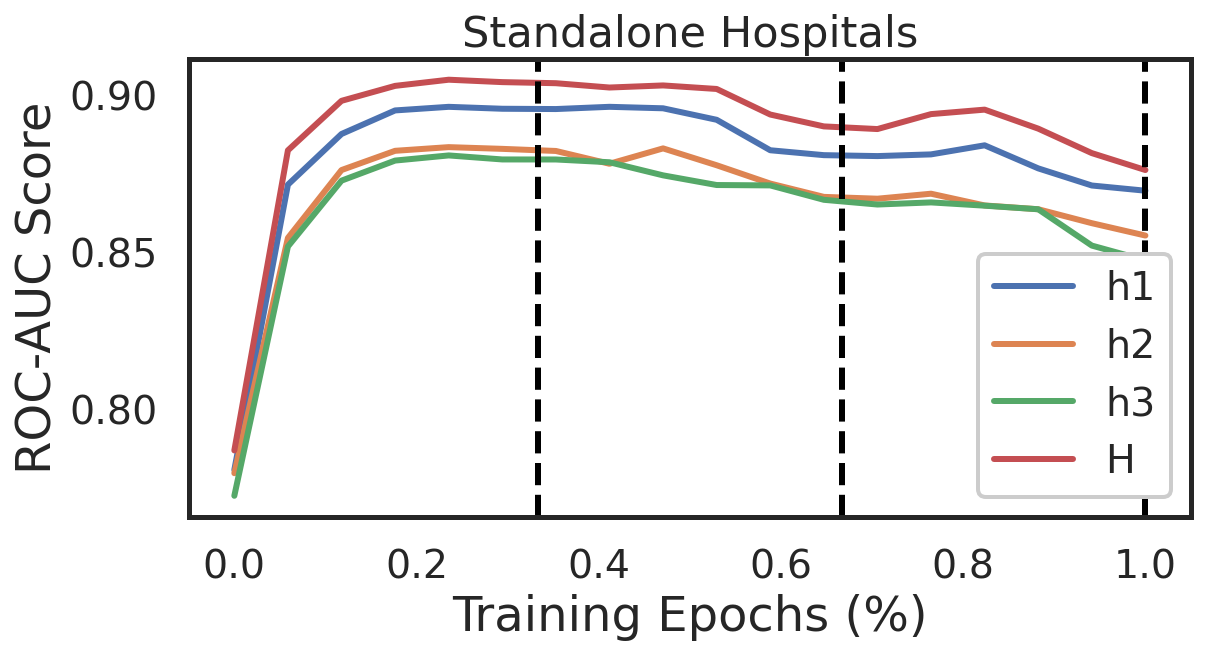

<Figure size 432x288 with 0 Axes>

In [41]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Cancer_Split_05_025_025_ROC_alone', True)

### Using FL

In [42]:
ls weights/Split_05_025_025/covid_database/federated_05_025_025/

 csv05_H0.csv               H0_roc_auc.png             H2_roc_auc.png
 csv05_H1.csv              'H1_confusion matrix.png'   round-1-weights.npz
 csv05_H2.csv               H1_roc_auc.png             round-2-weights.npz
'H0_confusion matrix.png'  'H2_confusion matrix.png'   round-3-weights.npz


In [43]:
#acc_H, roc_H = load_csv('weights/H/csv05_H.csv')
acc_h0, roc_h0 = load_csv('weights/Split_05_025_025/cancer_database/federated05_025_025/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_025_025/cancer_database/federated05_025_025/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_025_025/cancer_database/federated05_025_025/H2/csv05_H2.csv')

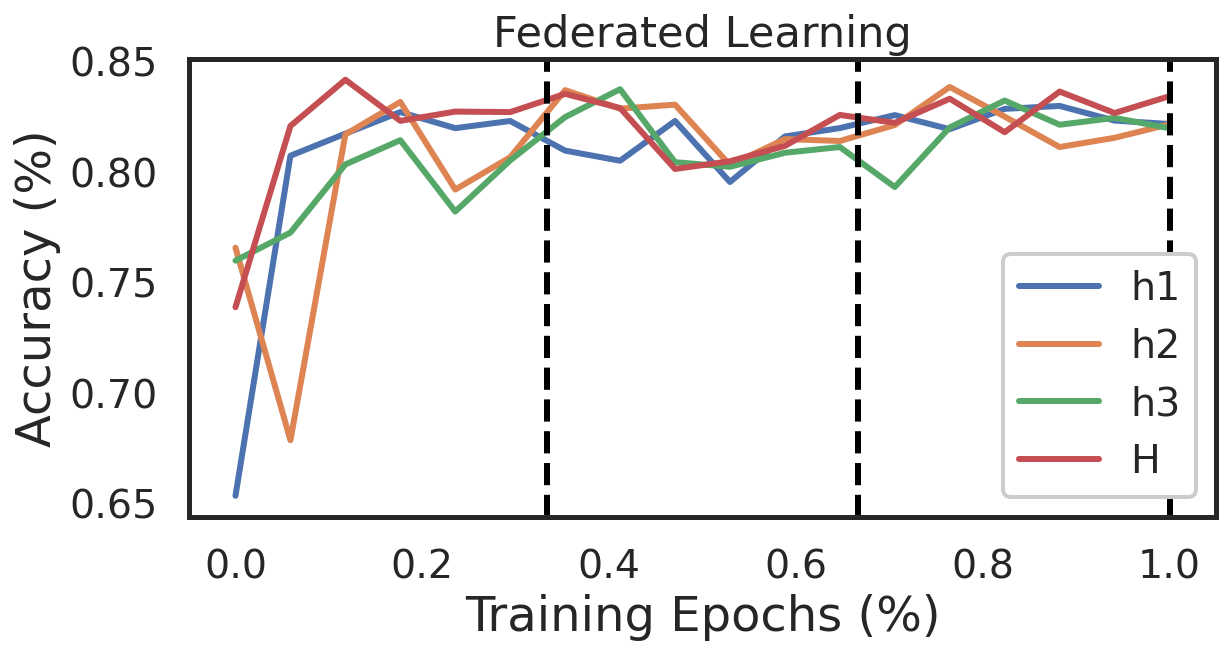

<Figure size 432x288 with 0 Axes>

In [44]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Federated Learning', 'Cancer_Split_05_025_025_ACC_FL', True)

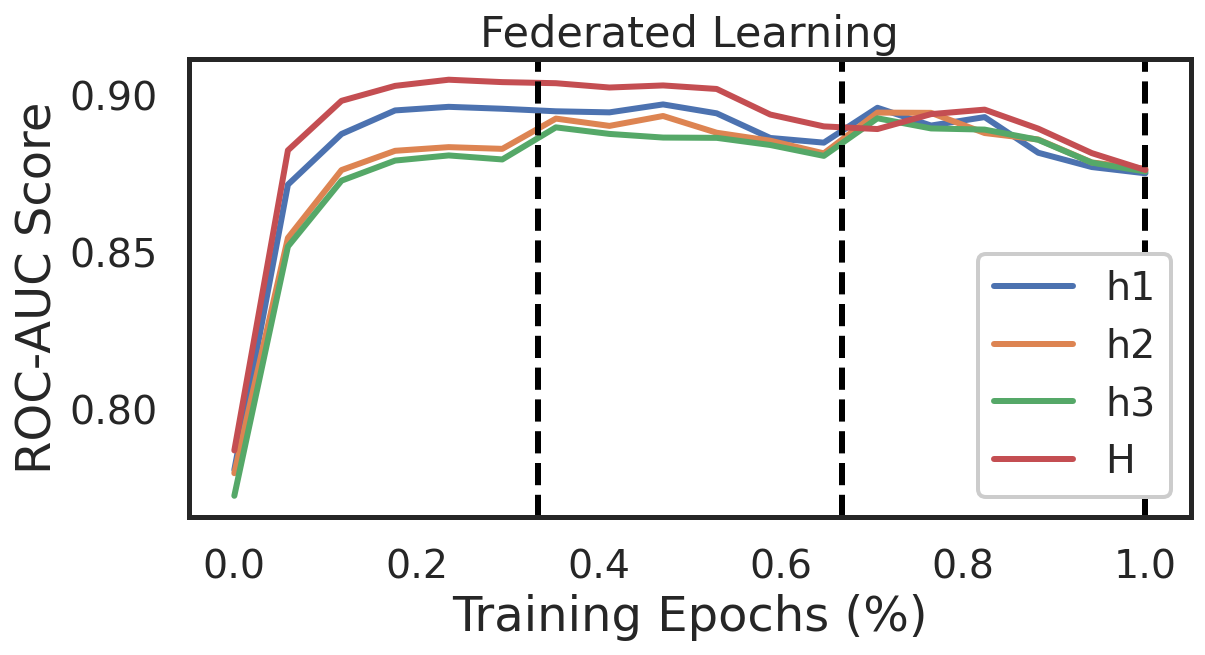

<Figure size 432x288 with 0 Axes>

In [45]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Federated Learning', 'Cancer_Split_05_025_025_ROC_FL', True)

## 05 033 017 Split

### Models Alone

In [46]:
ls weights/Split_05_033_017/covid_database/

federated_05_033_017/  no_federated05_033_017/


In [47]:
acc_h0, roc_h0 = load_csv('weights/Split_05_033_017/cancer_database/no_federated05_033_017/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csvbis('weights/Split_05_033_017/cancer_database/no_federated05_033_017/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_033_017/cancer_database/no_federated05_033_017/H2/csv05_H2.csv')

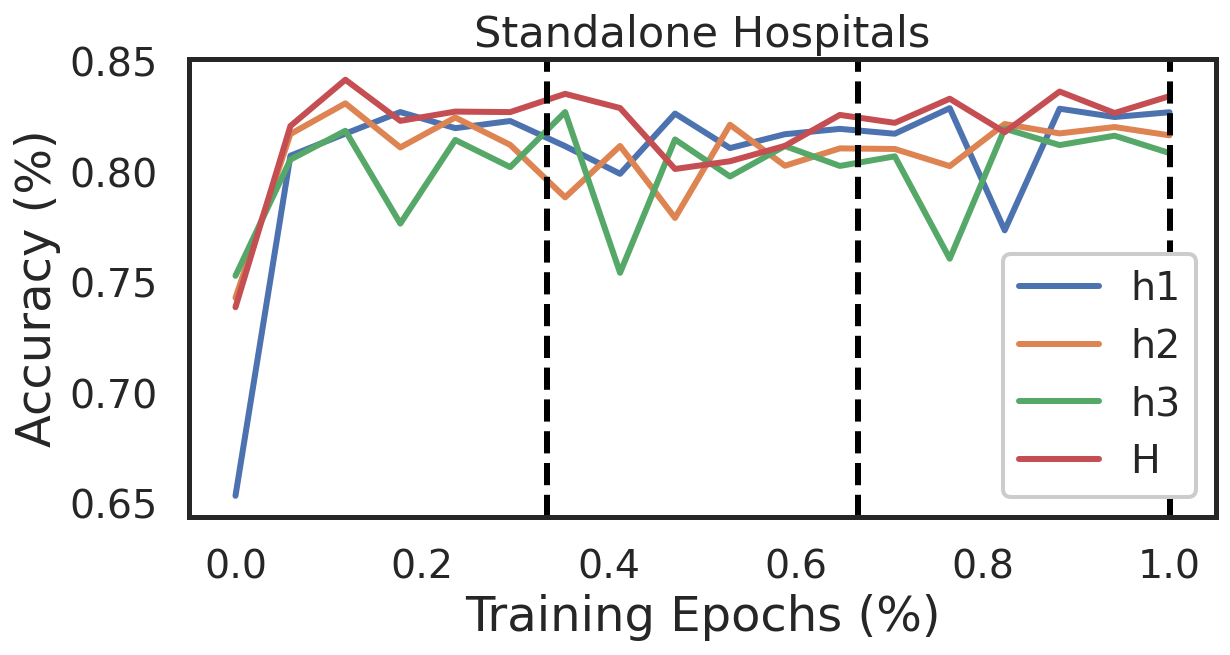

<Figure size 432x288 with 0 Axes>

In [48]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Cancer_Split_05_033_017_ACC_alone', True)

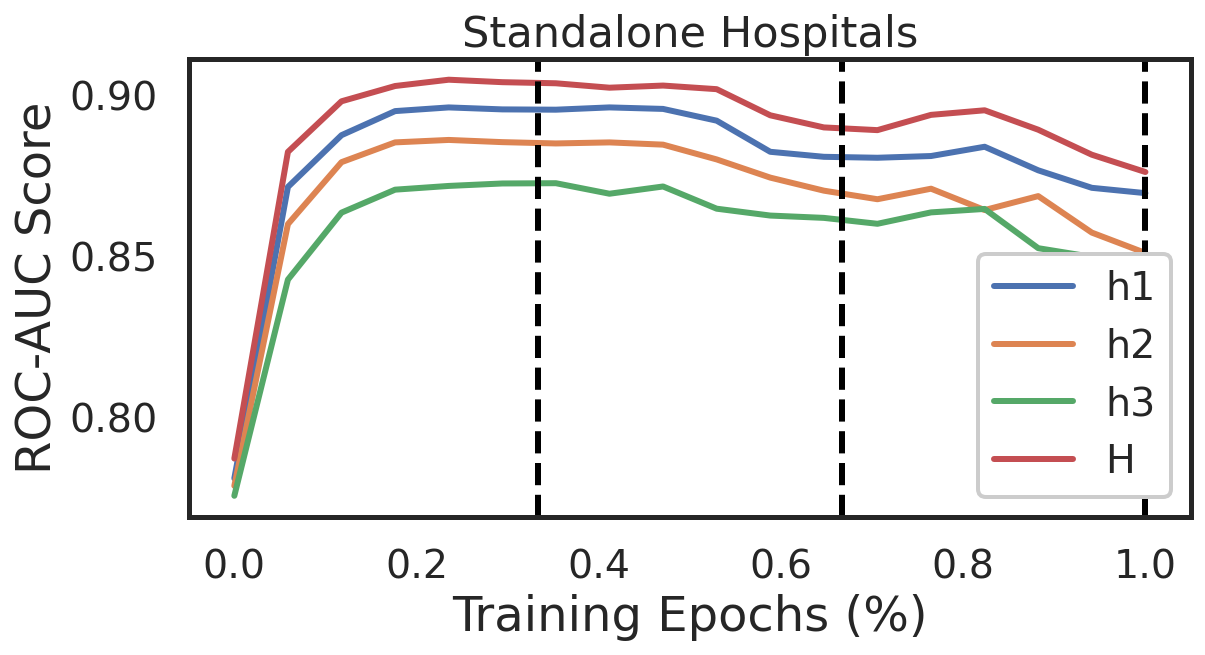

<Figure size 432x288 with 0 Axes>

In [49]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Cancer_Split_05_033_017_ROC_alone', True)

### FL

In [50]:
acc_h0, roc_h0 = load_csv('weights/Split_05_033_017/cancer_database/federated05_033_017/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_05_033_017/cancer_database/federated05_033_017/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_05_033_017/cancer_database/federated05_033_017/H2/csv05_H2.csv')

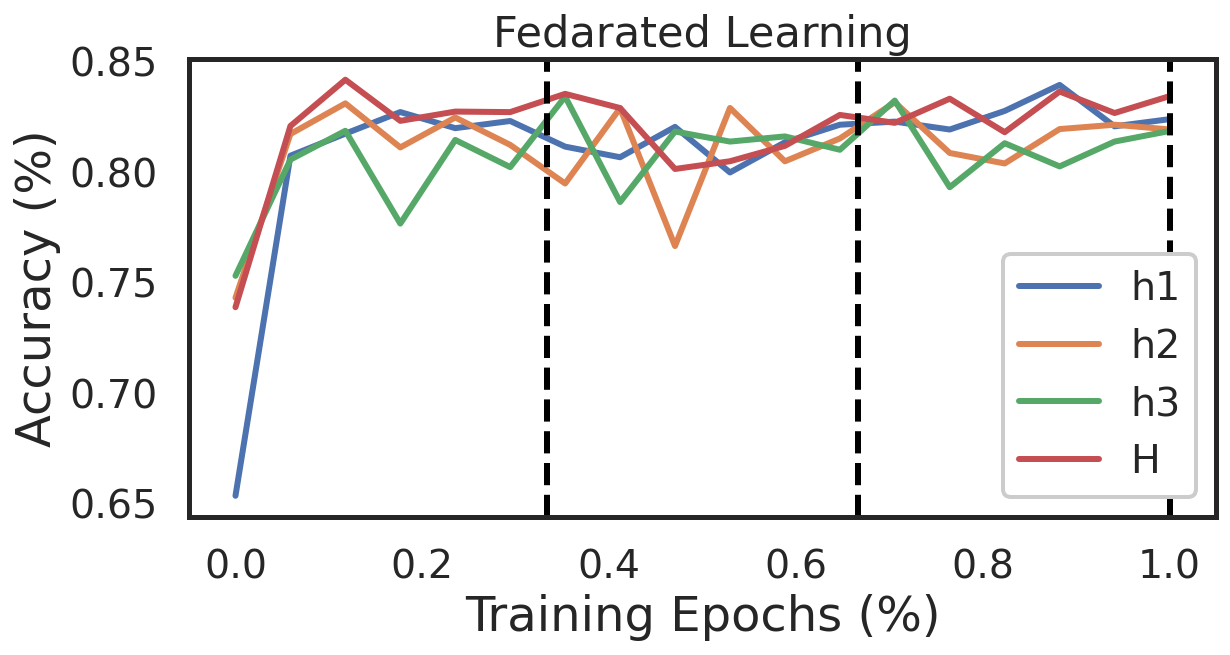

<Figure size 432x288 with 0 Axes>

In [51]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Fedarated Learning', 'Cancer_Split_05_033_017_ACC_FL', True)

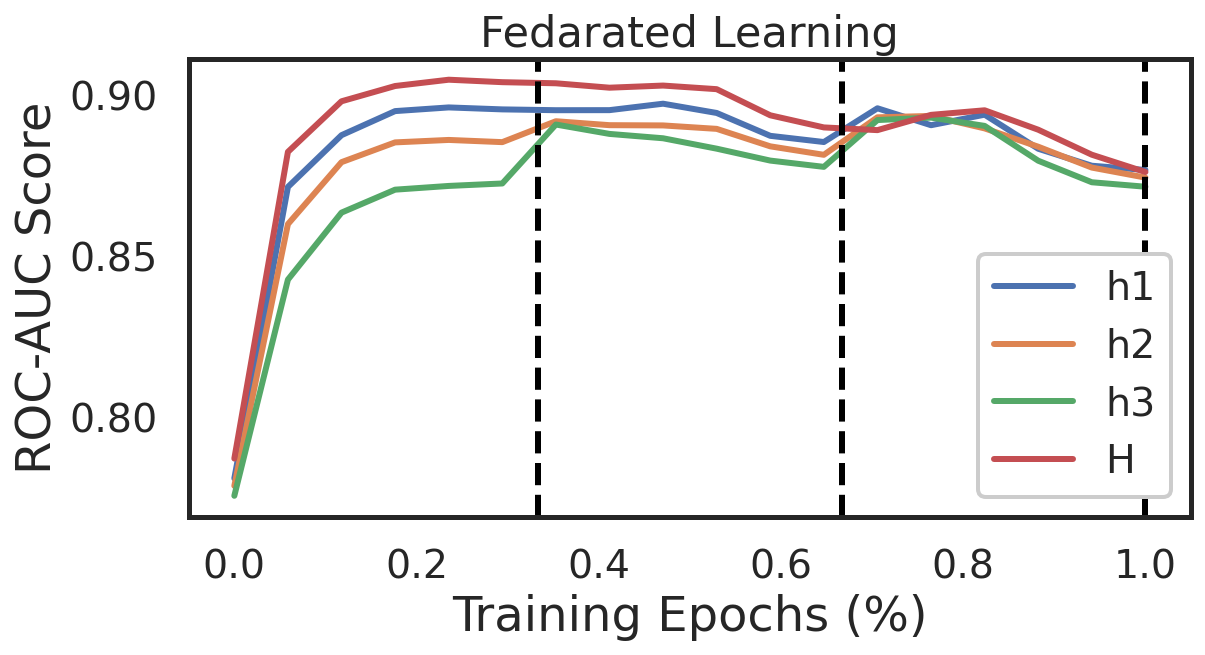

<Figure size 432x288 with 0 Axes>

In [52]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Fedarated Learning', 'Cancer_Split_05_033_017_ROC_FL', True)

## 033 033 033 Split

### Models Alone

In [53]:
ls weights/Split_03_03_03/

cancer_database/  covid_database/


In [54]:
acc_h0, roc_h0 = load_csv('weights/Split_03_03_03/cancer_database/no_federated03_03_03/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_03_03_03/cancer_database/no_federated03_03_03/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_03_03_03/cancer_database/no_federated03_03_03/H2/csv05_H2.csv')

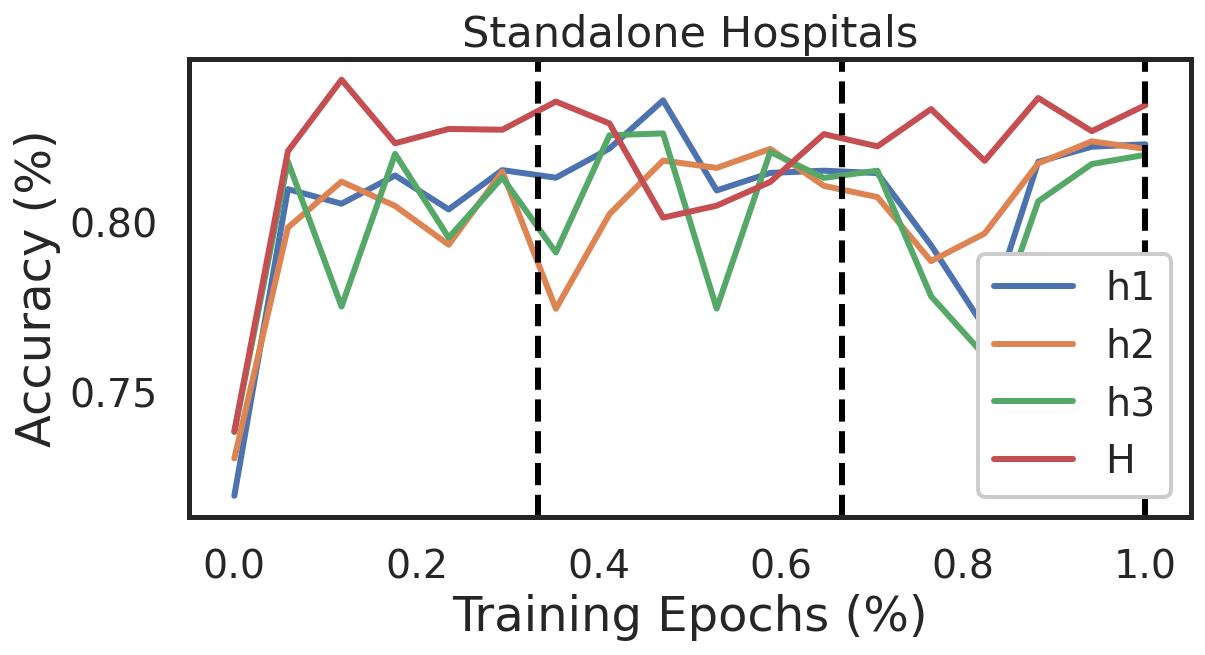

<Figure size 432x288 with 0 Axes>

In [55]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Standalone Hospitals', 'Cancer_Split_033_033_033_ACC_alone', True)

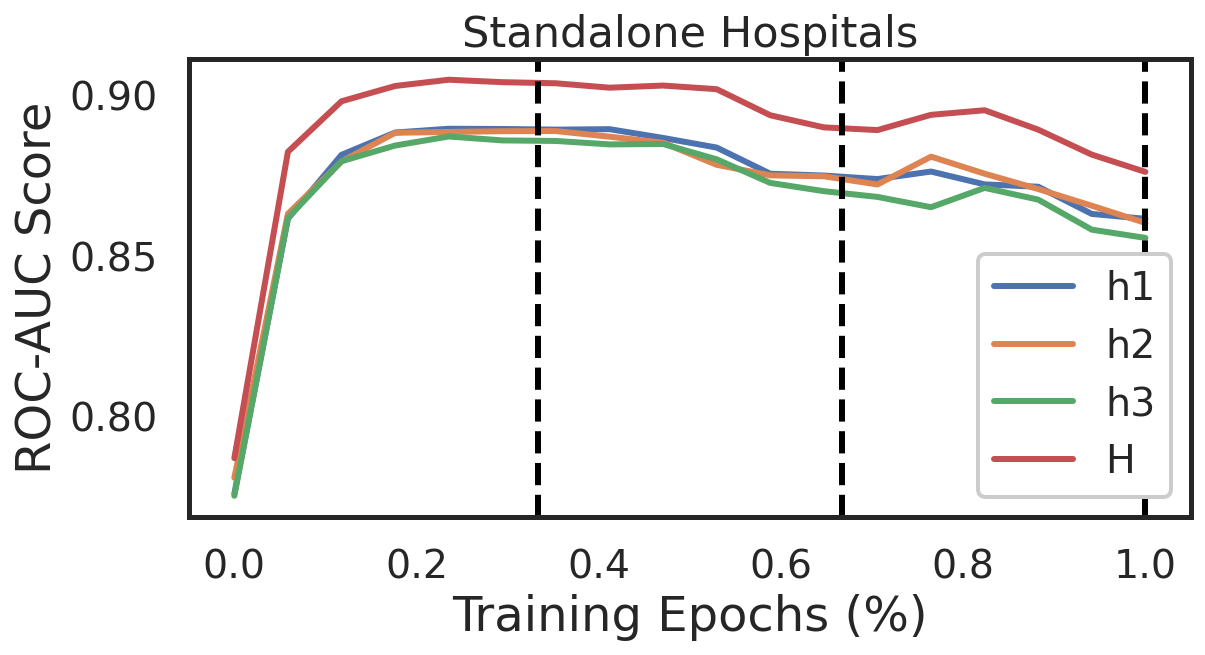

<Figure size 432x288 with 0 Axes>

In [56]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Standalone Hospitals', 'Cancer_Split_033_033_033_ROC_alone', True)

### FL

In [57]:
ls weights/Split_03_03_03/covid_database/

federated03_03_03/  no_federated03_03_03/


In [58]:
acc_h0, roc_h0 = load_csv('weights/Split_03_03_03/cancer_database/federated03_03_03/H0/csv05_H0.csv')
acc_h1, roc_h1 = load_csv('weights/Split_03_03_03/cancer_database/federated03_03_03/H1/csv05_H1.csv')
acc_h2, roc_h2 = load_csv('weights/Split_03_03_03/cancer_database/federated03_03_03/H2/csv05_H2.csv')

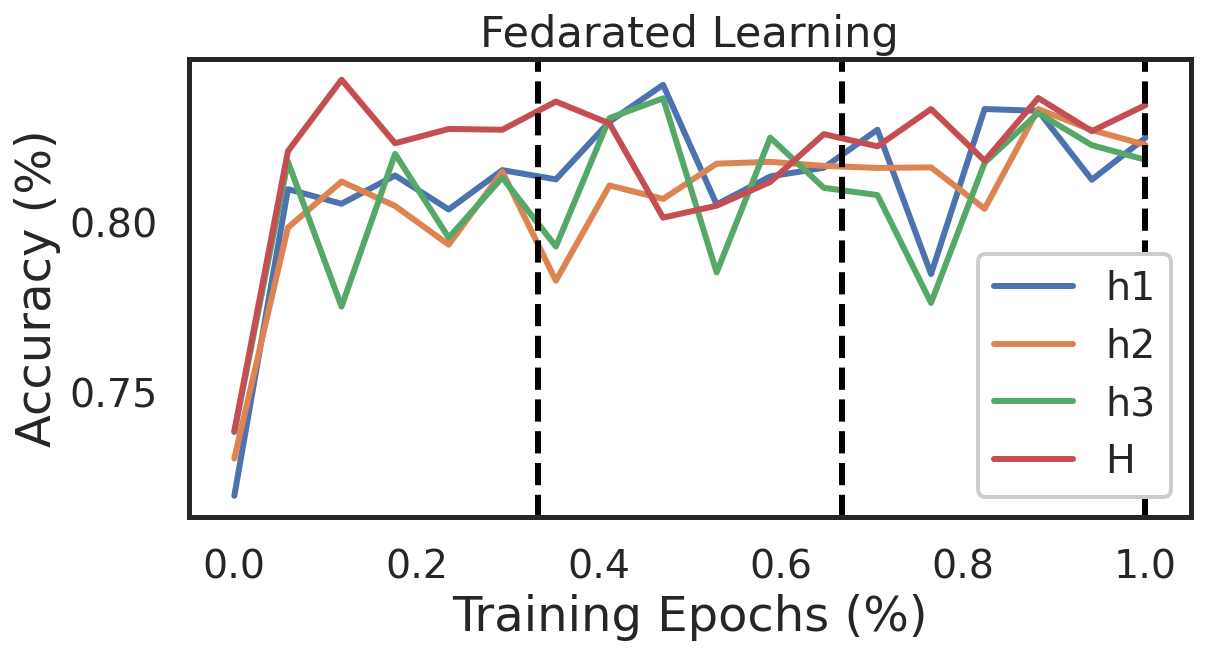

<Figure size 432x288 with 0 Axes>

In [59]:
plot_accs([acc_H, acc_h0, acc_h1, acc_h2], 'Fedarated Learning', 'Cancer_Split_033_033_033_ACC_FL', True)

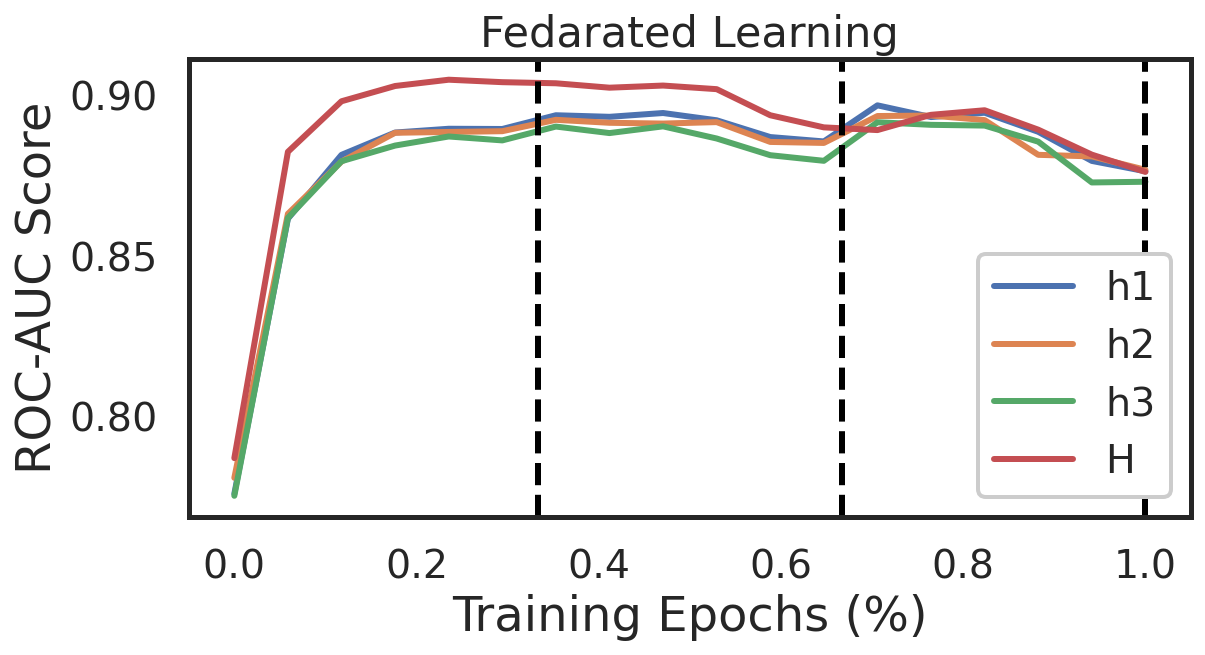

<Figure size 432x288 with 0 Axes>

In [60]:
plot_rocs([roc_H, roc_h0, roc_h1, roc_h2], 'Fedarated Learning', 'Cancer_Split_033_033_033_ROC_FL', True)